In [1]:
# How to estimate the distribution of a mean of 1000 data sampled from a normal distribution
# suppose X~N(0,1), what is the mean and variance of X1 + X2 + X3 + X4 + .. X1000?

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
X1 = np.random.randn(1) # from N(0,1) sample one data
X1

array([ 0.16524287])

In [22]:
Xs = np.zeros(1000) # an empty list to contain the numbers we generated
for i in range(len(Xs)):
    Xs[i] = np.random.randn(1)
Xs.shape

(1000,)

(array([   5.,   33.,   91.,  159.,  257.,  237.,  157.,   47.,    9.,    5.]),
 array([-3.21257082, -2.54107977, -1.86958871, -1.19809766, -0.5266066 ,
         0.14488445,  0.81637551,  1.48786656,  2.15935762,  2.83084867,
         3.50233973]),
 <a list of 10 Patch objects>)

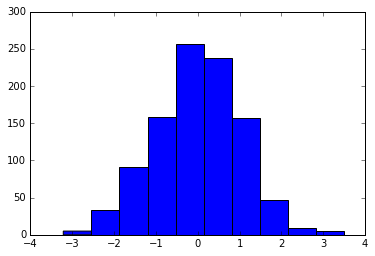

In [19]:
plt.hist(Xs)

In [21]:
# a better way
Xs = np.random.randn(1000)
Xs.shape

(1000,)

In [8]:
# if X's are random variables (they are independent, indistinct distributed, iid)
# their mean is also random variable, what is the mean and variance then?

X_mean = Xs.mean()
X_mean # we only have one value, how do we know its mean?

-0.1109736504404918

In [28]:
# well what we can do is to sample multiple batches, 
X_means = np.zeros(100)
for i in range(len(X_means)):
    Xs = np.random.randn(1000)
    X_means[i] = Xs.mean()

X_means


array([-0.02737729, -0.04328027,  0.02082542, -0.02080793,  0.03164378,
       -0.05244267,  0.04927302,  0.04787855,  0.00905774, -0.02752323,
       -0.01632407, -0.06875494, -0.03372393, -0.03633267,  0.03383566,
       -0.0162972 , -0.07826082,  0.01509654, -0.00642762,  0.04134374,
       -0.00894812, -0.05696323,  0.00344364,  0.00407279,  0.03972067,
        0.05886075, -0.00929873, -0.01111978, -0.00278702, -0.01948861,
       -0.03860462, -0.02497798,  0.0042429 , -0.00708963, -0.05034104,
        0.04971066,  0.03537885,  0.01226414,  0.01425575,  0.03584968,
        0.01378435, -0.06676255,  0.03662489, -0.02574083,  0.03200922,
       -0.04027029,  0.0104913 ,  0.01602305,  0.03477517,  0.04202556,
        0.01259785,  0.04115364, -0.0205642 ,  0.0193445 ,  0.02279941,
       -0.01446437, -0.02504138,  0.01054688, -0.01312499,  0.02361605,
       -0.00075015, -0.02887163, -0.00649257, -0.02496227, -0.02171986,
        0.00240832,  0.04514635,  0.00166235, -0.01868515, -0.09

(array([  1.,   3.,   3.,   9.,  21.,  16.,  18.,  12.,  15.,   2.]),
 array([-0.09490155, -0.07851734, -0.06213313, -0.04574893, -0.02936472,
        -0.01298052,  0.00340369,  0.01978789,  0.0361721 ,  0.0525563 ,
         0.06894051]),
 <a list of 10 Patch objects>)

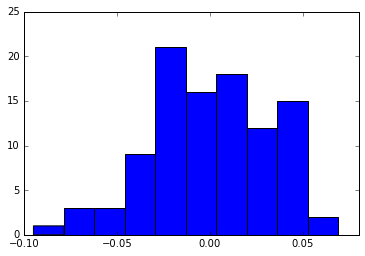

In [29]:
plt.hist(X_means)

In [30]:
print "the mean of X: ", np.random.randn(10000).mean()
print "the mean of mean(X1...X1000): ",X_means.mean()
print "the variance (standard deviation) of X: ",np.random.randn(10000).std()**2
print "the variance of mean(X1...X1000): ",X_means.std()**2

the mean of X:  -0.002328683023
the mean of mean(X1...X100):  -7.02972166096e-05
the variance (standard deviation) of X:  1.03824000258
the variance of mean(X1...X100):  0.00108598766631


In [31]:
# that is what we already know from math: var(X_mean) = var(X)/N


(array([  6.,   9.,  10.,  15.,  17.,  11.,  16.,   5.,   8.,   3.]),
 array([-0.04073961, -0.02710381, -0.013468  ,  0.00016781,  0.01380362,
         0.02743942,  0.04107523,  0.05471104,  0.06834684,  0.08198265,
         0.09561846]),
 <a list of 10 Patch objects>)

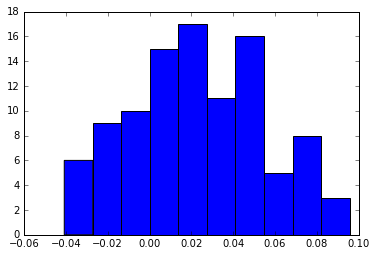

In [32]:
# how do we do it if we only has one sample of data. Say we only have one Xs
# we simulate the distribution of X by resampling the Xs
X_means_bootstrapping = np.zeros(100)
for i in range(len(X_means)):
    Xs_resample = np.random.choice(Xs, len(Xs)) 
    # bootstrapping, resample a sample data, to simulate the real distribution
    # generally speaking, resampling will use the same size as the original data
    X_means_bootstrapping[i] = Xs_resample.mean()

plt.hist(X_means_bootstrapping)

In [33]:
print "the mean of X: ", np.random.randn(10000).mean()
print "the mean of mean(X1...X100): ",X_means_bootstrapping.mean()
print "the variance (standard deviation) of X: ",np.random.randn(10000).std()**2
print "the variance of mean(X1...X100): ",X_means_bootstrapping.std()**2

the mean of X:  -0.00345451939631
the mean of mean(X1...X100):  0.0230893282286
the variance (standard deviation) of X:  0.995599071569
the variance of mean(X1...X100):  0.00104896047322


In [34]:
a = [1,2,3,4,5]
np.random.choice(a,5)

array([4, 3, 3, 4, 4])

In [35]:
np.random.choice(a,5, replace=False)

array([2, 3, 4, 5, 1])